In [60]:
# TODO: Sort by order
from scipy.stats import ranksums, ttest_ind, norm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>3.a</b>

In [2]:
sns.set_theme(style="ticks", palette="pastel")

In [3]:
# Does he mind if I use the transpose matrix or the normal?
# Reset columns names
# Should I keep ID_REF?
# Are all those manipulations necessary? I have to do it again to plot the data... (for example in 3.e)
raw_data = pd.read_csv('AMI_GSE66360_series_matrix.csv', encoding='utf-8', skiprows=58, encoding_errors='ignore', index_col=0, low_memory=False)
# class_row = raw_data.iloc[:1,:]
# display(class_row)
# float_data = raw_data.drop(["ID_REF", "Class"]).astype("float64")
# data = pd.concat([class_row, float_data])
# data
data = raw_data.drop("ID_REF")
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [4]:
count_M = (data.loc["Class"] == "M").sum()
count_H = (data.loc["Class"] == "H").sum()
count_M, count_H

(49, 50)

In [5]:
data_without_incomplete_genes = data.dropna()
data_without_incomplete_genes

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,3.139333661,3.039961017,3.220109351,3.263781541,3.138524252,3.043078536,3.231107638,3.304715967,3.384011442,3.139503936,...,3.525011316,3.309030335,3.663399948,3.32400503,4.619261018,5.558780351,3.416999272,3.699181146,3.48527965,4.211921779
AFFX-ThrX-M_at,2.7470148,2.63860588,2.495261011,2.544198973,2.506629527,2.817981885,2.525060286,2.91727791,2.643849254,2.787683948,...,2.930794418,2.745955351,3.165167607,2.899104156,4.066775612,5.429436708,2.834741433,3.24968301,2.71141329,3.346834702
AFFX-TrpnX-3_at,2.651554479,2.643615067,2.626028059,2.504957719,2.609707404,2.521610278,2.840601479,2.509774164,2.696820467,2.793540013,...,2.788852359,2.725246769,3.143400613,2.76875475,3.546116866,4.487940292,2.782355764,3.056726837,2.833818355,3.06954169
AFFX-TrpnX-5_at,3.413429017,3.399062751,3.539969696,3.396225335,3.43472012,3.516089622,3.514949337,3.475952299,3.495198562,3.580410844,...,3.701271488,3.456716807,4.127459216,3.668326993,4.889324389,4.254285925,3.882079933,3.649826789,3.523410023,4.108475085


In [6]:
# Is that true? number of genes (a+d)

3. Analysis:<br>
a. There are 54675 profiled genes in described in the dataset.<br>
b. There are 99 samples (subjects/patients) in total.<br>
c. There are 49 samples in class "M" and 50 samples in class "H".<br>
d. After removing the rows with the missing values - there were left 54630 rows in the dataframe which represent 54628 genes.<br> 

In [7]:
transposed_data_frame_without_incomplete_genes = data_without_incomplete_genes.T
transposed_data_frame_without_incomplete_genes.reset_index(inplace=True, drop=True)
transposed_data_frame_without_incomplete_genes

,Class,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,H,5.866377893,8.22579012,6.17973231,6.179477974,2.792047952,9.290410779,6.998285145,5.348943925,10.742427,...,13.25732501,13.26623454,14.57122985,14.27656808,4.504659469,3.139333661,2.7470148,2.651554479,3.413429017,3.140611771
1,H,4.948736331,7.525865369,6.628137025,6.58288903,2.69571445,9.462275035,6.558214949,5.410884095,9.865655308,...,13.59386023,13.51701336,14.73883363,14.34123318,4.409225776,3.039961017,2.63860588,2.643615067,3.399062751,3.132691213
2,H,5.148384393,7.764636529,5.859151477,6.602134766,2.580181122,9.116776316,6.851622539,5.254073031,10.148454,...,13.37275868,13.41658291,14.62718054,14.31856805,4.310075612,3.220109351,2.495261011,2.626028059,3.539969696,3.698396097
3,H,5.064418945,7.198461482,5.974135101,6.545904723,2.712123845,9.134584186,7.357827486,5.242139865,10.87991277,...,13.49022556,13.49482728,14.75412393,14.3632965,4.439310699,3.263781541,2.544198973,2.504957719,3.396225335,3.638611866
4,H,5.017832878,7.831450258,6.793079158,5.911542321,2.723686912,9.582343511,7.283872601,5.219483996,10.09052505,...,13.23678545,13.33019244,14.54838931,14.26367675,4.562883241,3.138524252,2.506629527,2.609707404,3.43472012,3.577649067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,M,6.472517225,8.261421952,6.367759272,6.440978114,3.73013912,7.355729877,6.206879166,6.217929861,5.375997385,...,6.601745953,5.94230757,7.290513508,8.988510881,5.567947288,5.558780351,5.429436708,4.487940292,4.254285925,5.375810973
95,M,5.678815851,6.925752665,6.835755831,6.955883278,2.914867562,7.944294937,6.638364166,5.992343792,9.613538724,...,14.2710373,14.16370633,14.88450605,14.79250553,4.902195229,3.416999272,2.834741433,2.782355764,3.882079933,3.744138165
96,M,5.653286378,7.918424183,7.577034915,6.499215058,3.013901455,8.563122679,7.379567509,5.766028609,9.312493837,...,13.89861618,13.68242475,14.88450605,14.78380144,5.239906199,3.699181146,3.24968301,3.056726837,3.649826789,4.021536308
97,M,6.013841046,7.442701377,7.147417202,6.587065112,2.729319786,8.699221635,6.598349589,5.577456268,9.617118255,...,13.84700646,13.55159338,14.85806628,14.7781659,4.556134169,3.48527965,2.71141329,2.833818355,3.523410023,3.81256443


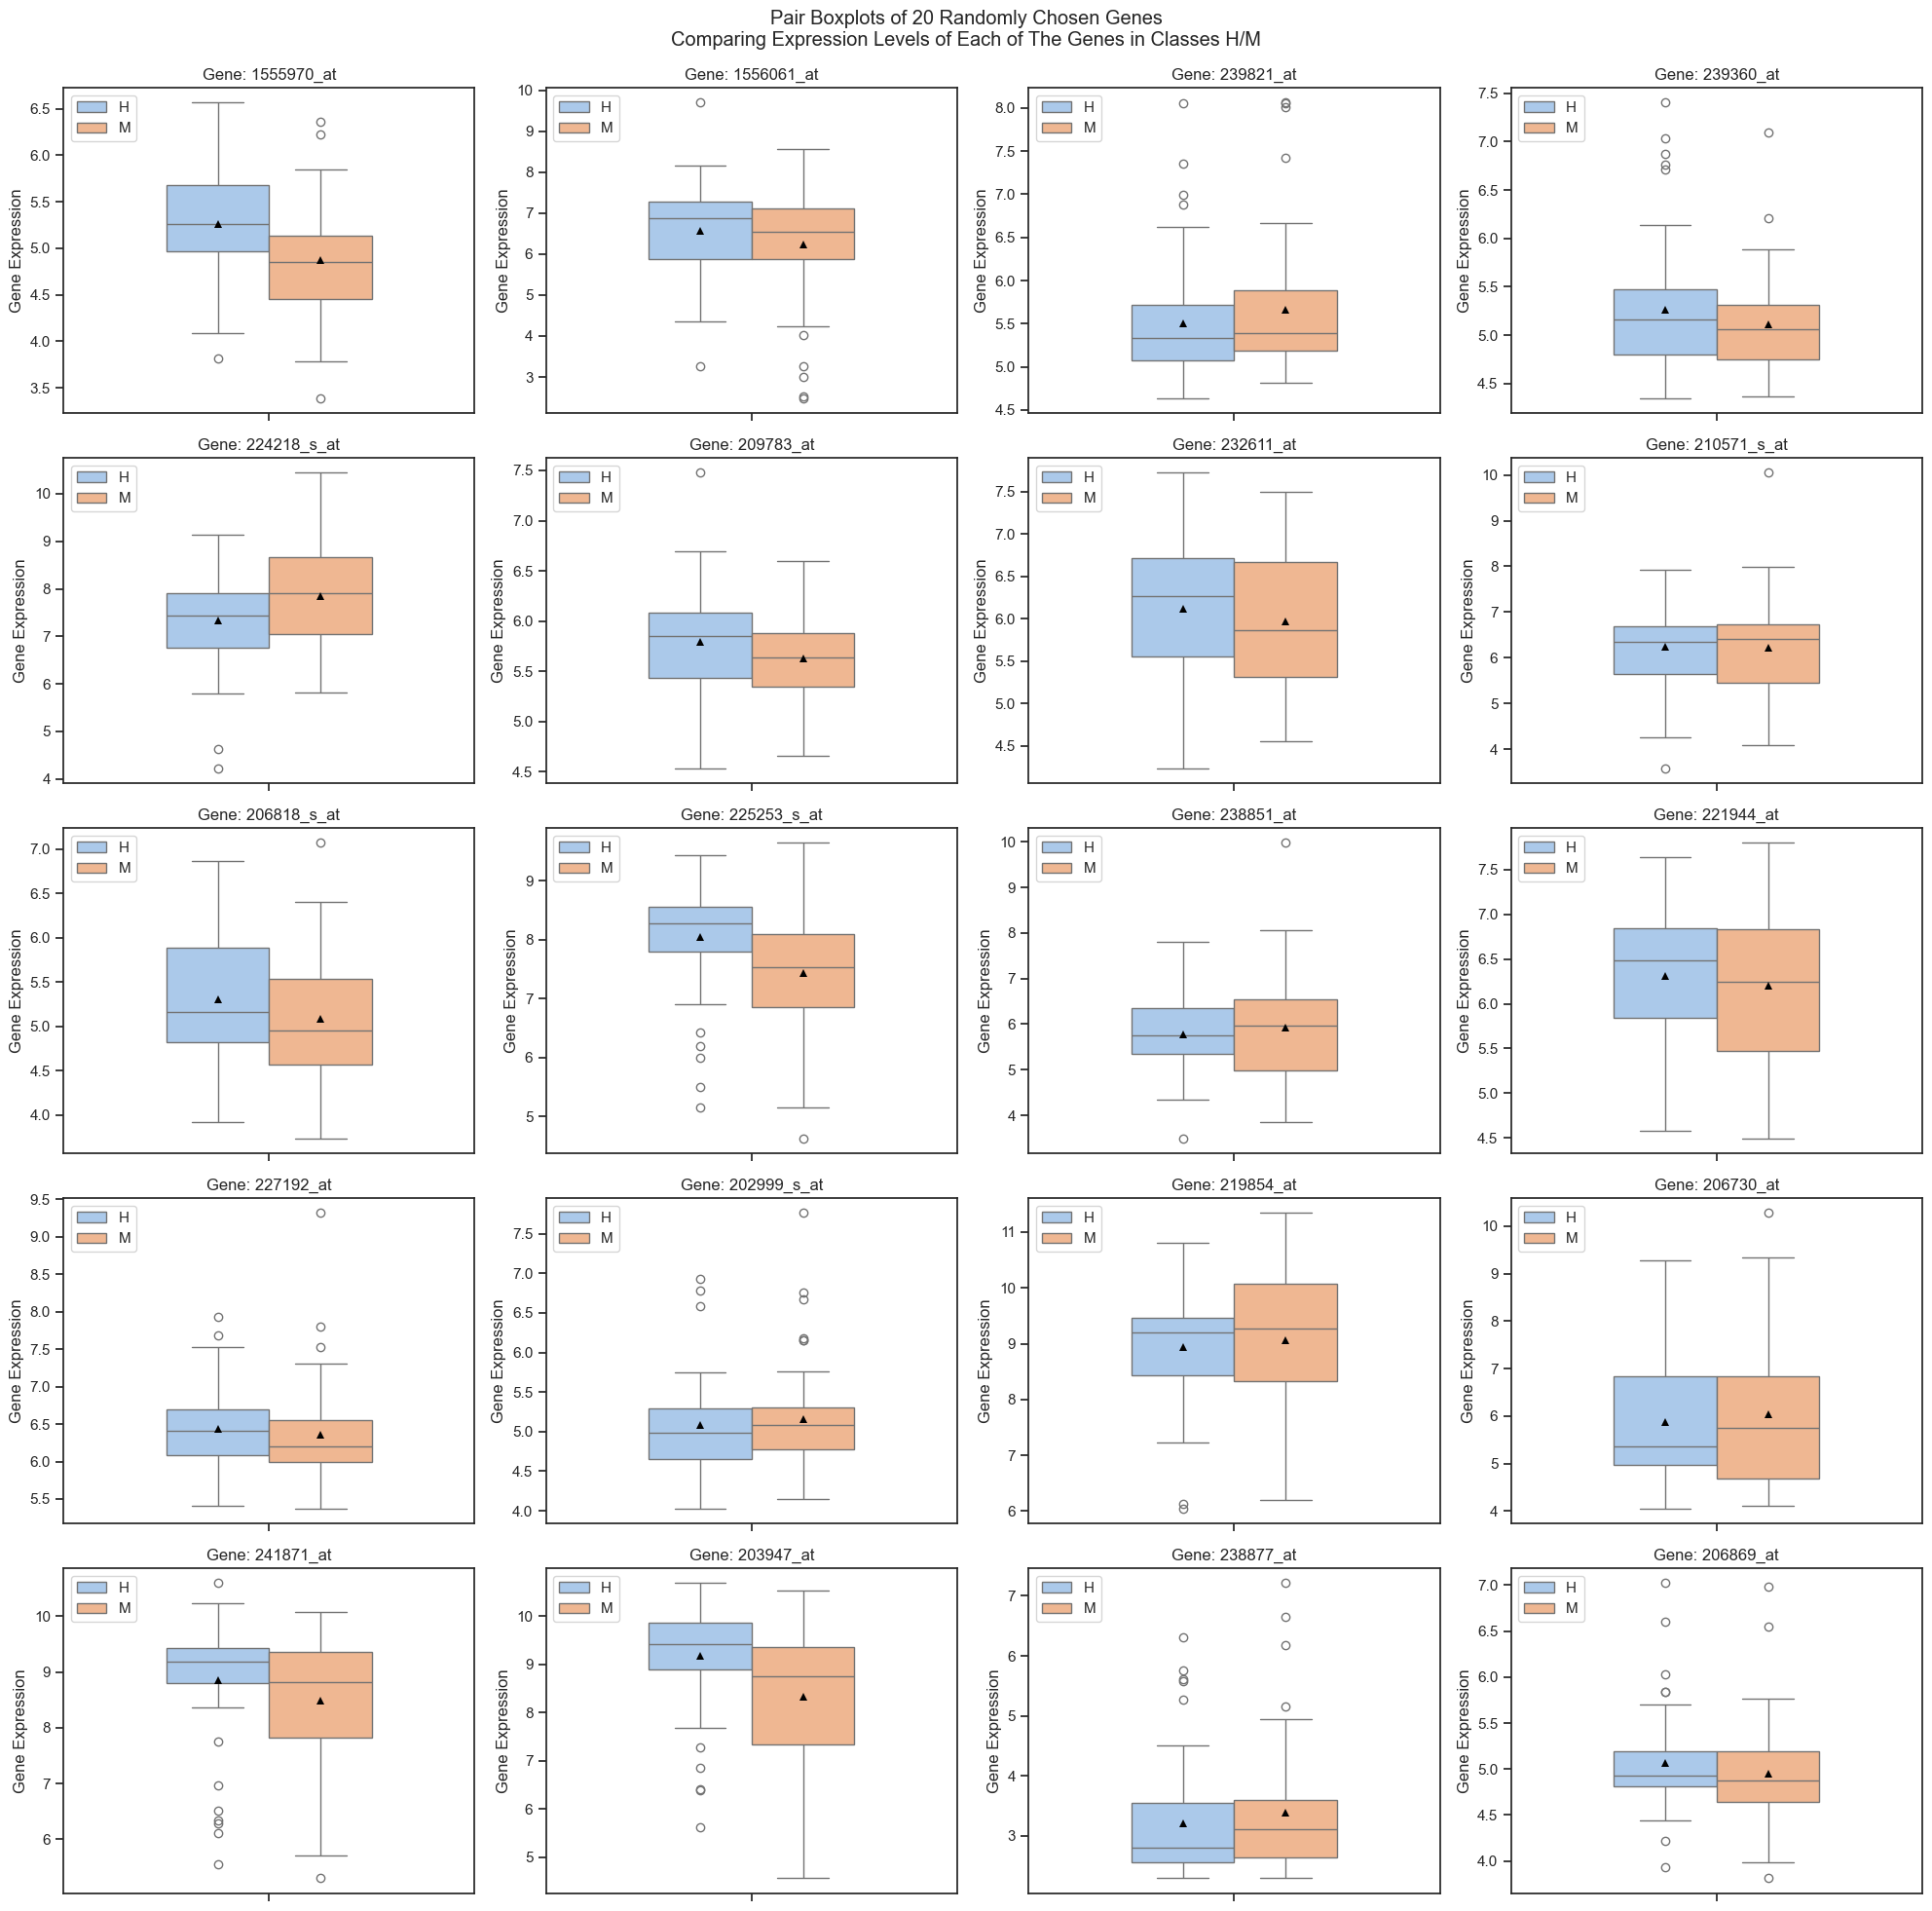

In [8]:
# Should I print values of quartiles, mean etc.?
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

all_gene_names = transposed_data_frame_without_incomplete_genes.columns
selected_genes = np.random.choice(all_gene_names, 20, replace=False)
selected_genes_with_label = np.insert(selected_genes, 0, "Class")
subset_data_without_incomplete_genes = transposed_data_frame_without_incomplete_genes[selected_genes_with_label]

for current_gene_name, gene in enumerate(selected_genes):
    gene_data = subset_data_without_incomplete_genes[[gene]].astype('float64')
    gene_data_with_class = pd.concat([subset_data_without_incomplete_genes["Class"], gene_data], axis=1)
    H_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "H"].astype(float)
    M_gene_data = gene_data[subset_data_without_incomplete_genes["Class"] == "M"].astype(float)
    
    sns.boxplot(y=gene,
                hue="Class",
                data=gene_data_with_class, 
                ax=axes[current_gene_name], showfliers=True, showmeans=True, meanprops={"markerfacecolor":"black", "markeredgewidth":0}, width=0.5)   
     
    axes[current_gene_name].set_title(f'Gene: {gene}')
    axes[current_gene_name].set_ylabel('Gene Expression')
    axes[current_gene_name].legend(loc='upper left')

plt.suptitle("Pair Boxplots of 20 Randomly Chosen Genes\nComparing Expression Levels of Each of The Genes in Classes H/M")
plt.tight_layout()
plt.subplots_adjust(top=0.94)
plt.show()

<b>3.b</b>
1. Under the null model, since there are 99 sampled patients the average rank is $\frac{99+1}{2}=50$.  There are 49 sampled patients labeled "M" so the expected sum of ranks under the null model is $49*\frac{99+1}{2} = 2450$
2. RS(g) takes on its maximal value, $c$ when the ranks of the expression levels of the "M" samples are 51 through 99.  $c=49*\frac{51+99}{2} = 3675$
3. Under the null model, the probability that RS(g) = c is $\frac{1}{99 \choose 49}$.  The reason is because under the null model every ranking arrangement is equally possible since there is no distinction between the "M" and "H" groups under the null model.  The situation where RS(g) = c is just one of the ${99 \choose 49}$ equal rank possibilities, so its probability is $\frac{1}{99 \choose 49}$ which is about $1.98*10^{-29}$.
4. The probability that RS(g) = c-1 is also $\frac{1}{99 \choose 49}$.  This is because there is only one arrangement that will yield RS(g) = c-1 = 3674.  That is the where the lowest of the M ranks in the maximum ranking of M, 51, is reduced by 1 so that the ranks of M are now 50, 52, 53,...,99.  This is the only arrangment that will yield a rank sum of c-1 since we need to reduce one of the ranks by one to get c-1 but if we reduce anything but rank 51 we would get an overlap of ranks (i.e. more than one of the same rank).
\
\
The probability of RS(g) = c-2 is $\frac{2}{99 \choose 49}$ since there are 2 arrangements that will yield RS(g) = c-2 = 3673.  The 2 arrangments are 49, 52, 53, 54,..,99 and 50, 51, 53, 54, 55,...,99.  The explanation is that to reduce the rank sum by 2 either we need to reduce a sinlge rank by 2 or two of the rankings by 1.  We can reduce rankings 51 and 52 by 1 each so we would get 50, 51, 53, 54, 55,...,99.  (This is same arrangement as if we would reduce rank 52 by 2).  The other option is we could reduce the lowest rank, rank 51, by 2, so we would get 49, 52, 53, 54,..,99.  These are 2 out of the $99 \choose 49$ combinations so the probability of getting RS(g) = c-2 is $\frac{2}{99 \choose 49}$
5. Here I am assuming that the highest DE level gets the highest rank (i.e rank is ascending):

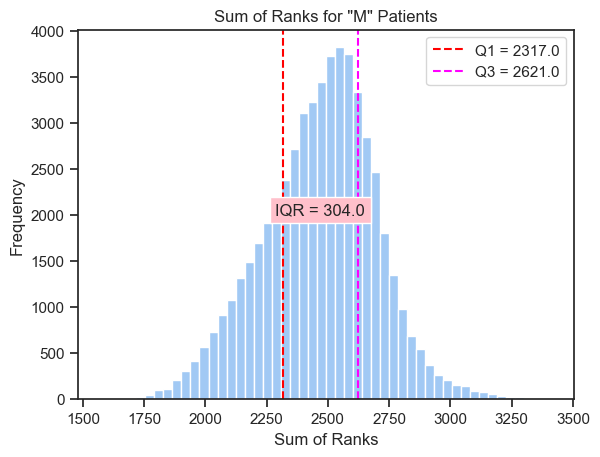

In [9]:
ranks = data.rank(axis=1, ascending=True)

M_class_members_mask = list(data.loc["Class"] == "M")
sum_of_ranks_M = ranks.loc[:, M_class_members_mask].sum(axis=1)
sum_of_ranks_M = sum_of_ranks_M.drop("Class")

Q1 = sum_of_ranks_M.quantile(0.25)
Q3 = sum_of_ranks_M.quantile(0.75)
IQR = Q3 - Q1

sum_of_ranks_M.plot(kind='hist', bins=50)

plt.title('Sum of Ranks for "M" Patients')
plt.xlabel('Sum of Ranks')
plt.ylabel('Frequency')

# Adding a line for Q1 and Q3 on the plot
plt.axvline(Q1, color='red', linestyle='--', label=f'Q1 = {Q1}')
plt.axvline(Q3, color='magenta', linestyle='--', label=f'Q3 = {Q3}')

plt.text(x=np.mean([Q1, Q3]), y=plt.ylim()[1]*0.5, s=f'IQR = {IQR}', 
         bbox=dict(facecolor='pink'), ha='center')

plt.legend()

plt.show()

<b>3.c</b>

In [209]:
# TODO: Check for double dataframes assignment
# TODO: duplicated - assign same rank
number_of_overexpressed_genes_in_M_using_WRS = 0
number_of_underexpressed_genes_in_M_using_WRS = 0
number_of_overexpressed_genes_in_M_using_ttest = 0
number_of_underexpressed_genes_in_M_using_ttest = 0

WRS_statistics_list = []
ttest_statistics_list = []
# Does names make sense?
WRS_overexpressed_p_values_list = []
WRS_underexpressed_p_values_list = []

# Need more variables?
# Will be used later
ttest_overexpressed_p_values_list = []

M_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "M"]
H_group_transposed_data = transposed_data_frame_without_incomplete_genes[transposed_data_frame_without_incomplete_genes["Class"] == "H"]
for current_gene_name in transposed_data_frame_without_incomplete_genes.columns[1:]:
    current_gene_expression_for_group_M = M_group_transposed_data[current_gene_name].astype(float)
    current_gene_expression_for_group_H = H_group_transposed_data[current_gene_name].astype(float)
    
    WRS_statistic = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H).statistic
    # Remove?
    WRS_statistics_list.append(WRS_statistic)
    ttest_statistic = ttest_ind(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').statistic
    # Remove?
    ttest_statistics_list.append(ttest_statistic)
    
    # Does this variable name (and next variables) make sense?
    WRS_overexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='greater').pvalue
    WRS_overexpressed_p_values_list.append(WRS_overexpressed_p_value)
    if WRS_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_WRS += 1
    
    # Will it be the same if I check for WRS_overexpressed_p_value > 0.093? is it true to use "less"?
    WRS_underexpressed_p_value = ranksums(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    WRS_underexpressed_p_values_list.append(WRS_underexpressed_p_value)
    if WRS_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_WRS += 1
    
    ttest_overexpressed_p_value = ttest_ind(current_gene_expression_for_group_M.astype(float), current_gene_expression_for_group_H.astype(float), alternative='greater').pvalue
    ttest_overexpressed_p_values_list.append(ttest_overexpressed_p_value)
    if ttest_overexpressed_p_value < 0.07:
        number_of_overexpressed_genes_in_M_using_ttest += 1
        
    ttest_underexpressed_p_value = ttest_ind(current_gene_expression_for_group_M, current_gene_expression_for_group_H, alternative='less').pvalue
    if ttest_underexpressed_p_value < 0.07:
        number_of_underexpressed_genes_in_M_using_ttest += 1



print(f'Number of overexpressed genes in M using WRS is: {number_of_overexpressed_genes_in_M_using_WRS}')
print(f'Number of underexpressed genes in M using WRS is: {number_of_underexpressed_genes_in_M_using_WRS}\n')
print(f'Number of overexpressed genes in M using ttest is: {number_of_overexpressed_genes_in_M_using_ttest}')
print(f'Number of underexpressed genes in M using ttest is: {number_of_underexpressed_genes_in_M_using_ttest}')


Number of overexpressed genes in M using WRS is: 10787
Number of underexpressed genes in M using WRS is: 10667

Number of overexpressed genes in M using ttest is: 8517
Number of underexpressed genes in M using ttest is: 8639


<b>3.d</b>

1.

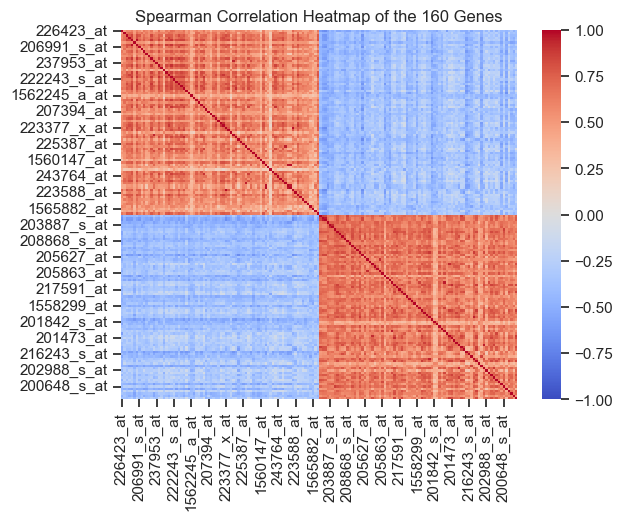

In [15]:
# Make sure I replaced variables correctly
indices = data_without_incomplete_genes.index[1:]
df_WRS_left_results = pd.DataFrame({
    'WRS_underexpressed_p_values_list': WRS_underexpressed_p_values_list
}, index=indices)
df_WRS_right_results = pd.DataFrame({
    'WRS_overexpressed_p_values_list': WRS_overexpressed_p_values_list
}, index=indices)

most_underexpressed_genes = df_WRS_left_results.sort_values(by='WRS_underexpressed_p_values_list').head(80)
most_overexpressed_genes = df_WRS_right_results.sort_values(by='WRS_overexpressed_p_values_list').head(80)

#get data in proper format
D = pd.concat([most_underexpressed_genes,most_overexpressed_genes])
D = pd.concat([D,data], axis=1, join="inner")
D = D.iloc[:,4:]

corr_matrix = D.transpose().corr(method='spearman')

sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap of the 160 Genes')
plt.show()

2. Under a null model that genes are pairwise independent the expected spearman correlation is 0.

In [21]:
D_over = D[80:]

corr_matrix = D_over.transpose().corr(method='spearman')
corr_matrix


,208869_s_at,216248_s_at,204622_x_at,244054_at,203887_s_at,203888_at,217202_s_at,203574_at,241279_at,240103_at,...,209774_x_at,232213_at,204351_at,235568_at,200648_s_at,228648_at,243395_at,211628_x_at,203936_s_at,218319_at
208869_s_at,1.000000,0.858918,0.833631,0.638544,0.633403,0.625329,0.695863,0.800968,0.701294,0.657782,...,0.632351,0.808069,0.699624,0.545143,0.744911,0.487797,0.706001,0.643751,0.530297,0.737981
216248_s_at,0.858918,1.000000,0.967836,0.661253,0.574519,0.566931,0.667118,0.777364,0.685804,0.649011,...,0.624316,0.789646,0.642660,0.528127,0.662174,0.524787,0.716968,0.667999,0.587155,0.764425
204622_x_at,0.833631,0.967836,1.000000,0.685554,0.559528,0.574663,0.649498,0.785044,0.658255,0.624053,...,0.580226,0.754892,0.587458,0.551060,0.642042,0.520369,0.681425,0.664002,0.597478,0.761585
244054_at,0.638544,0.661253,0.685554,1.000000,0.733063,0.734654,0.714088,0.758981,0.653035,0.777772,...,0.686159,0.539896,0.636519,0.702504,0.670747,0.652667,0.579542,0.622594,0.668262,0.624448
203887_s_at,0.633403,0.574519,0.559528,0.733063,1.000000,0.923706,0.682411,0.666316,0.663410,0.655520,...,0.680241,0.519172,0.619596,0.720584,0.637821,0.635165,0.550573,0.632022,0.544972,0.567484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228648_at,0.487797,0.524787,0.520369,0.652667,0.635165,0.666053,0.579397,0.578503,0.616387,0.572717,...,0.515503,0.371647,0.532098,0.665816,0.510414,1.000000,0.386217,0.536175,0.619175,0.333671
243395_at,0.706001,0.716968,0.681425,0.579542,0.550573,0.523643,0.666448,0.769027,0.693956,0.633284,...,0.681017,0.781059,0.686948,0.479171,0.733589,0.386217,1.000000,0.667749,0.539646,0.774222
211628_x_at,0.643751,0.667999,0.664002,0.622594,0.632022,0.625947,0.710144,0.686935,0.647933,0.562184,...,0.747738,0.633942,0.636677,0.681714,0.676757,0.536175,0.667749,1.000000,0.598122,0.732064
203936_s_at,0.530297,0.587155,0.597478,0.668262,0.544972,0.620937,0.624947,0.622659,0.652272,0.626604,...,0.575110,0.476383,0.583368,0.616361,0.519225,0.619175,0.539646,0.598122,1.000000,0.499211


<b>3.e</b>

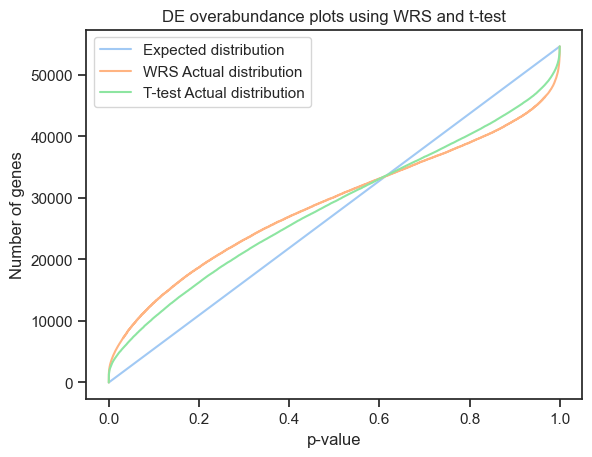

,number of genes with WRS FDR threshold,number of genes with t-test FDR threshold
threshold,,
0.050,2784.0,2104.0
0.010,1601.0,1305.0
0.005,1323.0,1104.0


In [281]:
N = len(WRS_overexpressed_p_values_list)
sorted_WRS_overexpressed_p_values_list = np.sort(WRS_overexpressed_p_values_list)
sorted_ttest_overexpressed_p_values_list = np.sort(ttest_overexpressed_p_values_list)

plt.plot(np.linspace(0, 1, N), np.arange(N), label="Expected distribution")
plt.plot(sorted_WRS_overexpressed_p_values_list, np.arange(N), label="WRS Actual distribution")
plt.plot(sorted_ttest_overexpressed_p_values_list, np.arange(N), label="T-test Actual distribution")
# Check title correctness
plt.title("DE overabundance plots using WRS and t-test")
plt.ylabel("Number of genes")
plt.xlabel("p-value")
plt.legend()
plt.show()

WRS_FDR_list, ttest_FDR_list = [], []
for i in range(1, N+1):
    WRS_current_p_value = sorted_WRS_overexpressed_p_values_list[i - 1]
    WRS_current_FDR = (WRS_current_p_value * N) / i
    WRS_FDR_list.append(WRS_current_FDR)
    
    ttest_current_p_value = sorted_ttest_overexpressed_p_values_list[i - 1]
    ttest_current_FDR = (ttest_current_p_value * N) / i
    ttest_FDR_list.append(ttest_current_FDR)

number_of_genes_with_WRS_FDR_threshold = pd.DataFrame({"threshold": [], "number of genes with WRS FDR threshold": [], "number of genes with t-test FDR threshold": []})
for threshold in [0.05, 0.01, 0.005]:
    WRS_k = next(index for index, WRS_FDR in enumerate(WRS_FDR_list) if (WRS_FDR >= threshold))
    ttest_k = next(index for index, ttest_FDR in enumerate(ttest_FDR_list) if (ttest_FDR >= threshold))
    new_row = pd.DataFrame({"threshold": [threshold], "number of genes with WRS FDR threshold": [WRS_k], "number of genes with t-test FDR threshold": [ttest_k]})
    number_of_genes_with_WRS_FDR_threshold = pd.concat([number_of_genes_with_WRS_FDR_threshold, new_row], ignore_index=True)

number_of_genes_with_WRS_FDR_threshold = number_of_genes_with_WRS_FDR_threshold.set_index("threshold")
number_of_genes_with_WRS_FDR_threshold
        